# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [39]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [40]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]


In [41]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]


In [42]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]



In [43]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_ride = total_fares_by_type/total_rides_by_type



In [44]:
# 5. Get the average fare per driver for each city type. 
avg_fare_by_driver = total_fares_by_type/total_drivers_by_type



In [45]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
                "Total Rides": total_rides_by_type,
                "Total Drivers": total_drivers_by_type,
                "Total Fares": total_fares_by_type,
                "Average Fare by Ride": avg_fare_by_ride,
                "Average Fare by Driver": avg_fare_by_driver})




In [46]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None



In [47]:
#  8. Format the columns.
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare by Ride"] = pyber_summary_df["Average Fare by Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare by Driver"] = pyber_summary_df["Average Fare by Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare by Ride,Average Fare by Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [38]:
# 1. Read the merged DataFrame
pyber_data2_df = pyber_data_df.set_index(['type', 'date'])


In [48]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

fare_totals = pyber_data2_df.groupby(['type', 'date']).sum()['fare']



In [49]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_totals = fare_totals.reset_index()

In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_totals_pivot = fare_totals.pivot(index='date', columns='type', values='fare')

fare_totals_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [51]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_totals_update_df = fare_totals_pivot.loc['1/1/2019':'4/29/2019']



In [52]:
fare_totals_update_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2057 entries, 1/1/2019 0:08 to 4/28/2019 9:25
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3+ KB


In [53]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fare_totals_update_df.index = pd.to_datetime(fare_totals_update_df.index)

In [54]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_totals_update_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [22]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_totals_weekly_df = fare_totals_update_df.resample('W').sum()

fare_totals_weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


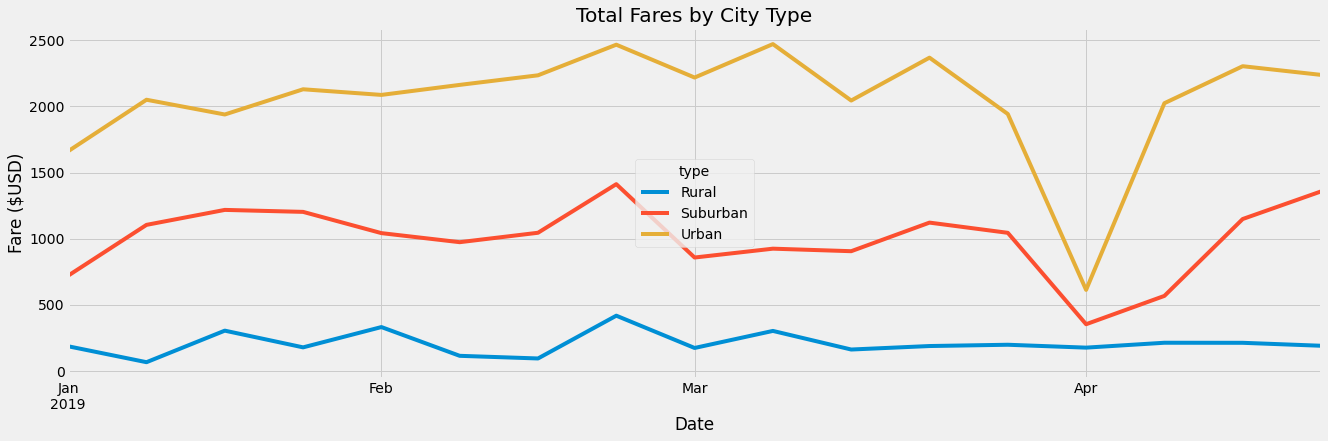

In [37]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

fare_totals_weekly_df.plot(figsize=(20,6))
plt.xlabel("Date")
plt.ylabel('Fare ($USD)')
plt.title("Total Fares by City Type")

            
# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#safe file
plt.savefig("Analysis/Pyber_fare_summary.png")





